# Student Score Prediction 
# Task submitted by Neda Zahid

# 1. Importing the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 2.Reading the DataSet

In [3]:
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df=pd.read_csv(url)

In [4]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# 3.Graphical representation of the data points

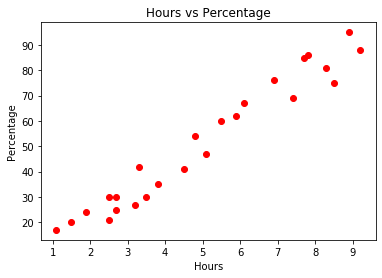

In [5]:
plt.scatter(df.Hours,df.Scores,color='red')
plt.title('Hours vs Percentage')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()

# 4.Preparing the datasets

In [6]:
x=df.drop('Scores',axis=1)
y=df['Scores']

In [7]:
from sklearn.model_selection import train_test_split as tts
train_x,test_x,train_y,test_y=tts(x,y,random_state=0,test_size=0.2)

# 5.Training the algorithm

In [8]:
from sklearn.linear_model import LinearRegression as LR

In [9]:
lr=LR()
lr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# 6.Plotting the regression line

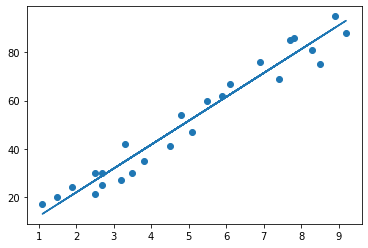

In [10]:
line=lr.coef_*df.Hours+lr.intercept_
plt.scatter(df.Hours,df.Scores)
plt.plot(df.Hours,line)
plt.show()

# 7.Testing the model

In [11]:
predict=lr.predict(test_x)
predict

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [12]:
# comparing actual vs predicted
#residuals is the difference between actual and predicted values
residuals=pd.DataFrame({'Actual Values':test_y,'Predicted Values':predict})
residuals['Residuals']=residuals['Actual Values']-residuals['Predicted Values']
residuals.head()


,Actual Values,Predicted Values,Residuals
5,20,16.884145,3.115855
2,27,33.732261,-6.732261
19,69,75.357018,-6.357018
16,30,26.794801,3.205199
11,62,60.491033,1.508967


# 8.Evaluating the model

In [13]:
lr.score(test_x,test_y)

0.9454906892105356

# This shows that our model is 94% accurate